# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [277]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [278]:
# Checking the number of mice.
mouse_count = len(study_data_complete_df[("Mouse ID")].unique())
mouse_count

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for i, x in enumerate(study_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])):
    if x==True:
        print(study_data_complete_df.iloc[i,[0,5]])     

Mouse ID     g989
Timepoint       0
Name: 909, dtype: object
Mouse ID     g989
Timepoint       5
Name: 911, dtype: object
Mouse ID     g989
Timepoint      10
Name: 913, dtype: object
Mouse ID     g989
Timepoint      15
Name: 915, dtype: object
Mouse ID     g989
Timepoint      20
Name: 917, dtype: object


In [51]:
# Get all the data for the duplicate mouse ID. 
dupe_df = study_data_complete_df.loc[study_data_complete_df["Mouse ID"]=="g989"]
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
fresh_df = study_data_complete_df[study_data_complete_df["Mouse ID"]!="g989"]
fresh_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(fresh_df[("Mouse ID")].unique())
mouse_count

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = fresh_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = fresh_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_std = fresh_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(ddof=1)
tumor_var = fresh_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(ddof=1)
tumor_sem = tumor_std / (len(fresh_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]) ** 0.5)

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 
                              'Median Tumor Volume': tumor_median,
                             'Tumor Volume Variance': tumor_var,
                             'Tumor Volume Std. Dev.': tumor_std,
                             'Tumor Volume Std. Err.': tumor_sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.579486
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.982175
Infubinol,52.884795,51.820584,43.128684,6.567243,2.076745
Ketapril,55.235638,53.698743,68.553577,8.279709,2.618274
Naftisol,54.331565,52.509285,66.173479,8.134708,2.572421
Placebo,54.033581,52.288934,61.168083,7.821003,2.473218
Propriva,52.320930,50.446266,43.852013,6.622085,2.094087
Ramicane,40.216745,40.673236,23.486704,4.846308,1.532537
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.438249


In [279]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary = fresh_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(
    ['mean','median','var','std','sem'])
tumor_summary_df = tumor_summary.rename(columns={'mean': 'Mean Tumor Volume', 
                              'median': 'Median Tumor Volume',
                             'var':'Tumor Volume Variance',
                             'std': 'Tumor Volume Std. Dev.',
                             'sem': 'Tumor Volume Std. Err.'})
tumor_summary_df

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                            
             Tumor Volume Std. Dev. Tumor Volume Std. Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

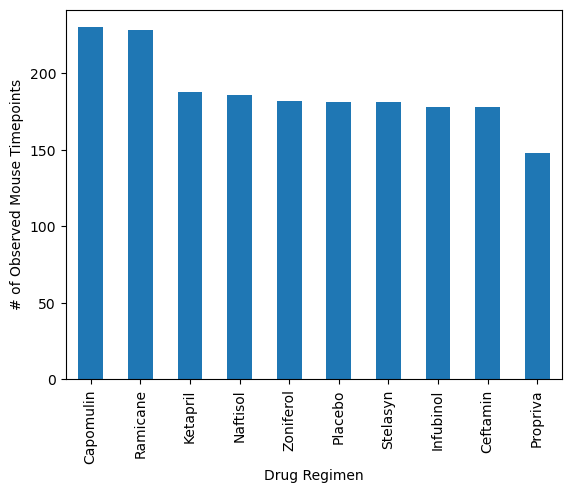

In [284]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
id_counts = fresh_df["Drug Regimen"].value_counts()

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Plot the bar plot
id_counts.plot(kind="bar")  

<BarContainer object of 10 artists>

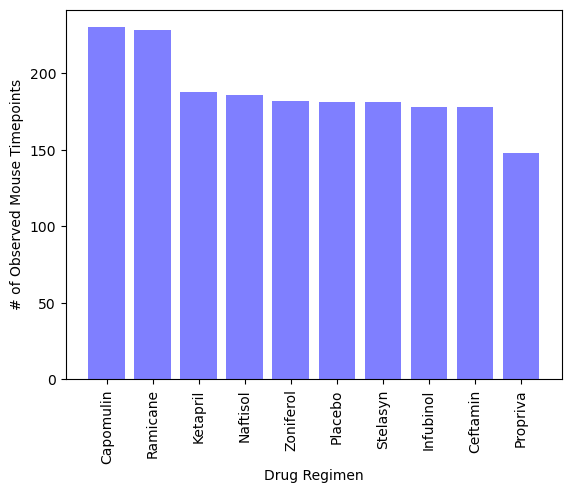

In [285]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
id_counts = fresh_df["Drug Regimen"].value_counts()
x_axis = id_counts.index

# Rotate tick marks 90 degrees 
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
# Plot the bar plot
plt.bar(x_axis, id_counts, color='b', alpha=0.5, align="center")

<Axes: ylabel='Sex'>

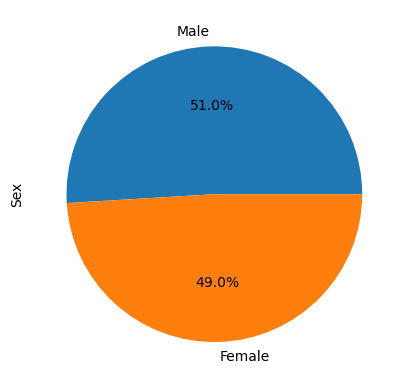

In [286]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = fresh_df["Sex"].value_counts()

sex_count.plot(kind="pie", labels=sex_count.index, autopct="%.1f%%")

Text(0, 0.5, 'Sex')

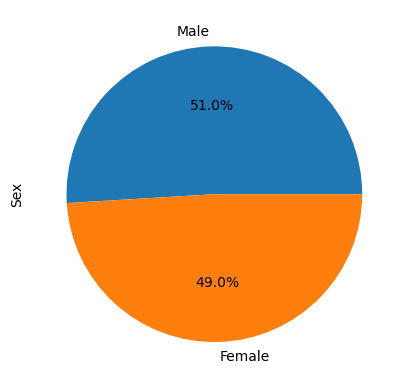

In [287]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct="%.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [288]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = fresh_df.groupby("Mouse ID")["Timepoint"].max()

max_time_df = pd.DataFrame(max_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
freshest_df = pd.merge(fresh_df, max_time_df, on=("Mouse ID","Timepoint"), how="right")
freshest_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [289]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_total = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
for x in treatments:
    tumor_vol = freshest_df.loc[freshest_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_vol_total.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {x}, the outliers are: {outliers}")


For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


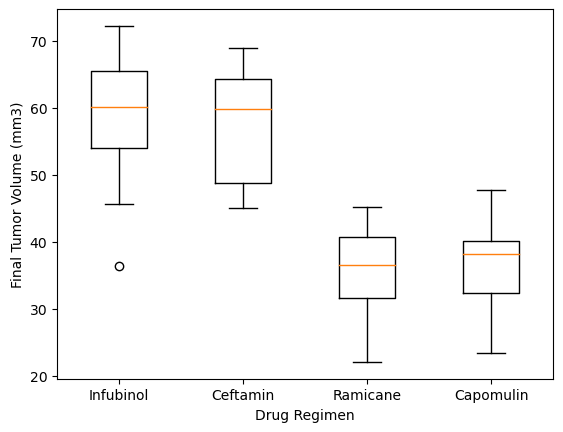

In [290]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_total, labels=treatments)
plt.show()

## Line and Scatter Plots

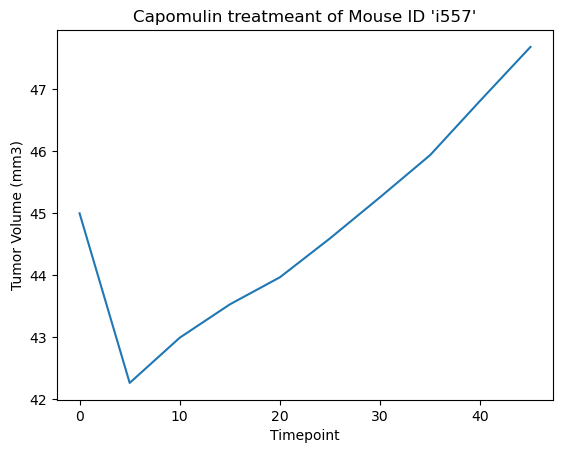

In [291]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = fresh_df.loc[fresh_df["Drug Regimen"]=="Capomulin",:]
mouse_df = cap_df.loc[cap_df["Mouse ID"]=="i557",:]

# Set title and labels
plt.title("Capomulin treatmeant of Mouse ID 'i557'")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Plot line plot
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_94045/2826331207.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_size_df = cap_df.groupby(["Mouse ID"]).mean()


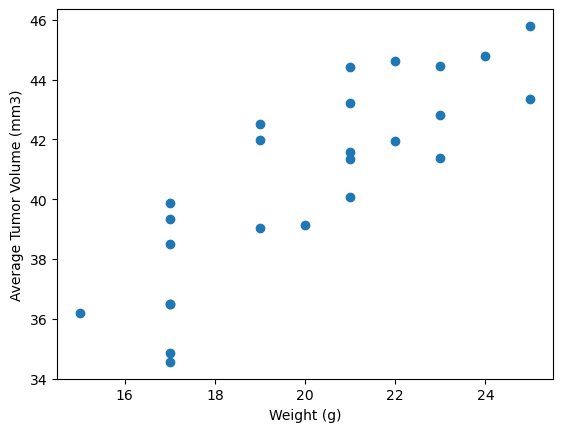

In [292]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_size_df = cap_df.groupby(["Mouse ID"]).mean()

# Set labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plot scatter plot
plt.scatter(avg_size_df["Weight (g)"],avg_size_df["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


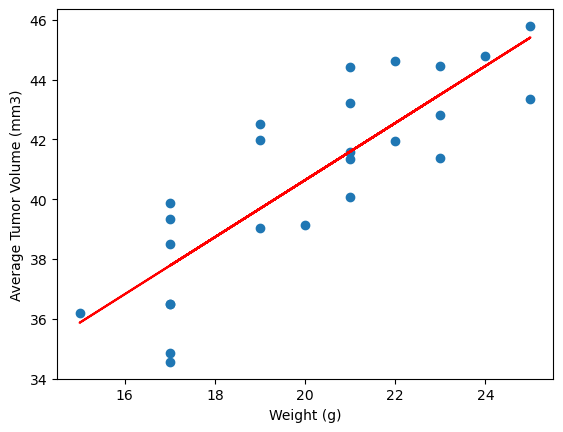

In [293]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Generating linear regression model
x_values = avg_size_df["Weight (g)"]
y_values = avg_size_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Generating correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")